<a href="https://colab.research.google.com/github/alfaroqueIslam/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/LS_DS_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



In [0]:
# TODO - code!
# Part 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):
  
  p_not_drunk = 1 - prob_drunk_prior

  numerator = true_positive_rate*prob_drunk_prior

  denominator = true_positive_rate*prob_drunk_prior + false_positive_rate*p_not_drunk

  post_prob = numerator / denominator
  print(post_prob)
  return post_prob;

def prob_drunk_loop(num):
  x = 0
  y = 1
  while y == 1:
    num = prob_drunk_given_positive(num, .08, 1)
    x = x + 1
    if num > .95:
      print('iterations: ', x)
      return num
      



In [17]:
num = prob_drunk_given_positive(.001, .08, 1)
# 0.012357884330202669
prob_drunk_given_positive(num, .08, 1)
# 0.13525210993291495
prob_drunk_loop(.001)
# It takes 4 iterations to reach a prior of greater than 95%

0.012357884330202669
0.13525210993291495
0.012357884330202669
0.13525210993291495
0.6615996951348605
0.9606895076105054
iterations:  4


0.9606895076105054

In [20]:
# Part 2
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

column_headers = ['party','handicapped-infants','water-project',
                  'budget','physician-fee-freeze', 'el-salvador-aid',
                  'religious-groups','anti-satellite-ban',
                  'aid-to-contras','mx-missile','immigration',
                  'synfuels', 'education', 'right-to-sue','crime','duty-free',
                  'south-africa']
df = pd.read_csv('house-votes-84.data', names=column_headers)
df = df.replace({"y": 1, "n": 0, "?": np.NaN})

def confidence_interval(data, confidence=0.95):
  
  data = np.array(data)
  x_bar = np.mean(data)
  n = len(data)
  s = np.std(data, ddof=1)
  std_err = s / np.sqrt(n)
  t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
  margin_of_error = t*std_err
  lower_bound = x_bar - margin_of_error
  upper_bound = x_bar + margin_of_error
  return (lower_bound, x_bar, upper_bound)

--2020-05-13 21:19:22--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.06s   

2020-05-13 21:19:22 (279 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [0]:
crime_bill = df['crime'].dropna()

lower:  0.546017195315226 mean:  0.5933014354066986 upper:  0.6405856754981711


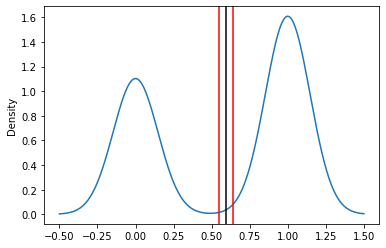

In [29]:
lower, mean, upper = confidence_interval(crime_bill)
print('lower: ', lower, 'mean: ', mean, 'upper: ', upper)
crime_bill.plot.density()
plt.axvline(x=lower, color='red')
plt.axvline(x=mean, color='black')
plt.axvline(x=upper, color='red')
plt.show()

Mean(statistic=0.5933014354066986, minmax=(0.546017195315226, 0.6405856754981711))


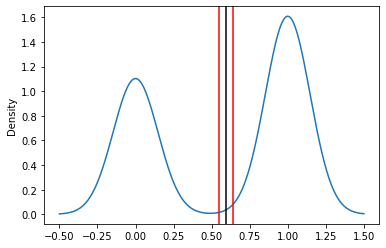

In [30]:
mean_cb, _, _ = stats.bayes_mvs(crime_bill, alpha=.95)
print(mean_cb)
crime_bill.plot.density()
plt.axvline(x=mean_cb.minmax[0], color='red')
plt.axvline(x=mean_cb.statistic, color='black')
plt.axvline(x=mean_cb.minmax[1], color='red')
plt.show()

Using Bayesian and Frequentist methods to get the Convidence Interval of the crime bill dataset returned the same result.

### Part 3: The difference between Bayesian and Frequentist Statistics ###

  In Frequentist statistics a sample of data is examined with no prior or posterior probability of the hypothesis. Conclusions are inferred based on the given sample of data with no outside influences. In Bayesian statistics there is a subjective Prior value or probability used along with the given sample that is used to influence the conclusion. To use an example where a Police Officer just arrived at the scene of a convenience store robbery, a Frequentist officer would use the clues in front of him to see which way the robber may have went such as items the robber may have dropped while running away or bushes that have been disturbed. A Bayesian officer may consider places in the area that criminals have hid in the past or the knowledge of repeat offenders that are known to the area.



## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!